### model 6 - GAP replaces 6*6 Kernel and add a 1*1 in last layer

#### Target:
1. Add GAP and remove the last BIG kernel (6*6 Kernel) 
2. Add a 1*1 in the last layer

#### Results:
Total parameters: 5,194
Best Training Accuracy - 98.97 at the 15th Epoch
Best Testing Accuracy - 99.35 at the 12th epoch

#### Analysis:
1. Total paramters decreased is around 3500 parameters and thats around half the total paramters in the previous model.GAP has reduced the dimensionality of the feature maps resulting in a better representation. 
2. Introducing GAP has included some discrepancy, the model cannot be compared but does seem to be underfitting. 

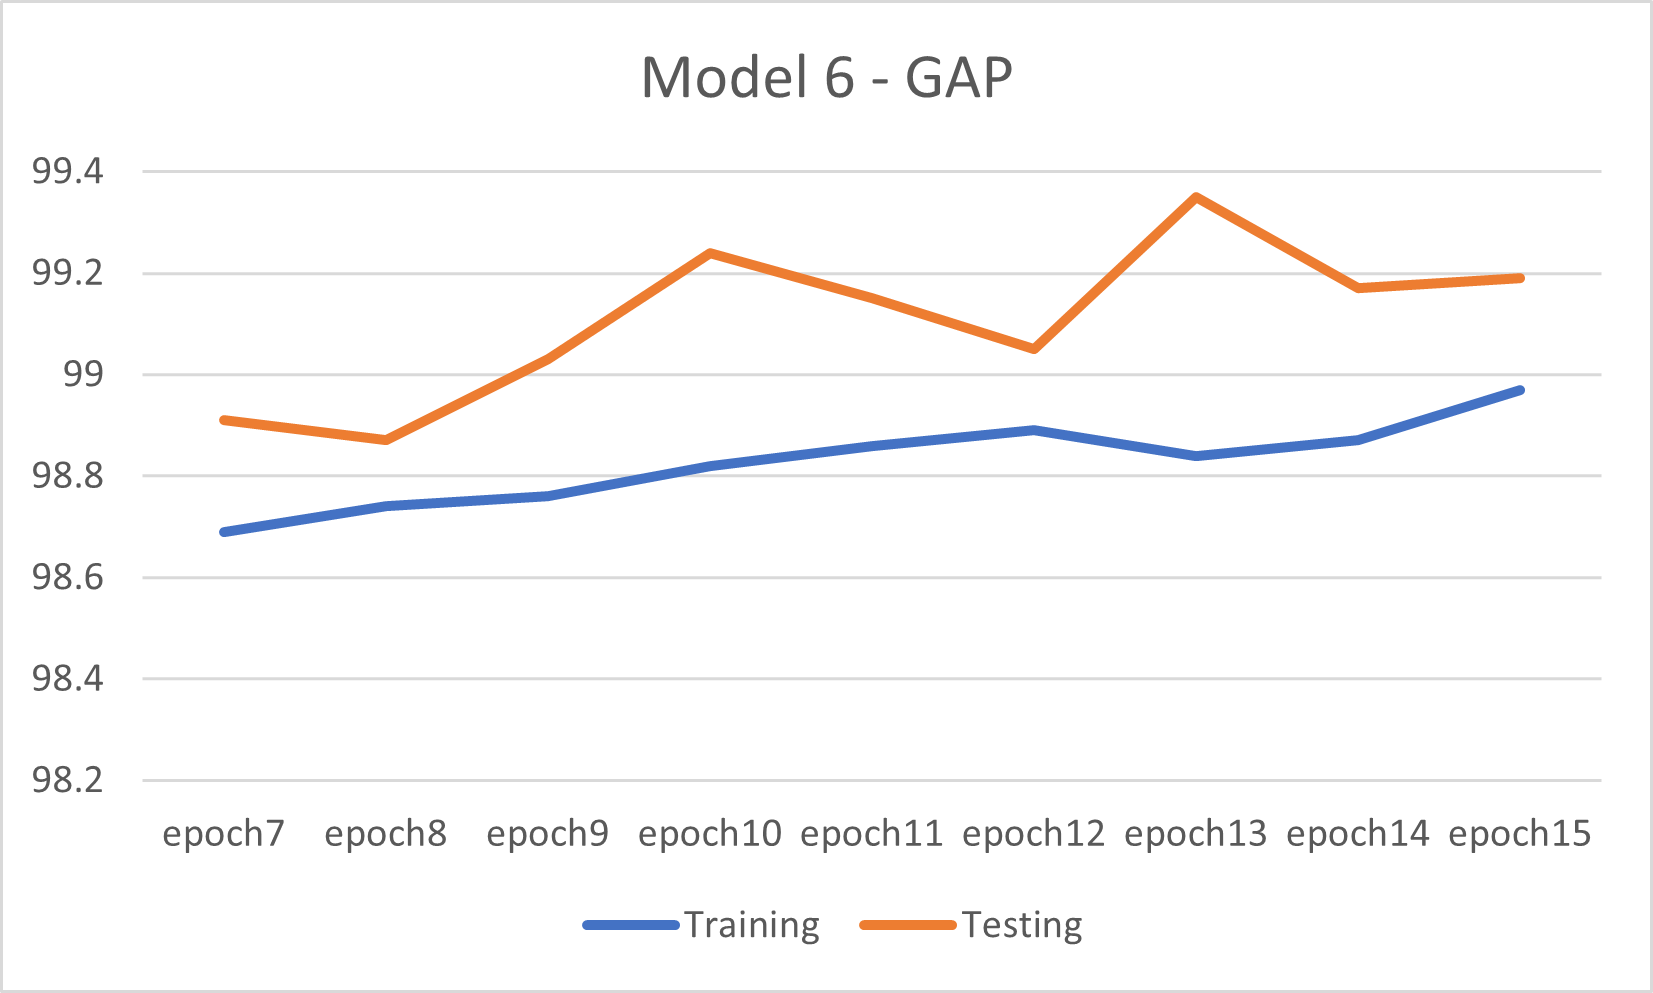

# Import Libraries

In [1]:
from __future__ import print_function
import torch
# import torch.nn as nn
# import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from utils import train_test_dataloader
import models
from models import model_summary, train, test, plot_accuracy_loss, model6

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.


In [2]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Device: ", device)


# Train data transformations
train_transformer = [transforms.RandomRotation((-7., 7.), fill=0),transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,)),]

# Test Phase transformations
test_transformer = [transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train and test dataloader
train_loader,test_loader = train_test_dataloader(train_transformer, test_transformer, dataloader_args)

CUDA Available? True
Device:  cuda


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Model Params
Can't emphasize on how important viewing Model Summary is.
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [3]:
# sending model to device
model = model6().to(device)

# Generating model summary
model_summary(model,(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
       BatchNorm2d-2           [-1, 10, 28, 28]              20
              ReLU-3           [-1, 10, 28, 28]               0
           Dropout-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 12, 28, 28]           1,080
       BatchNorm2d-6           [-1, 12, 28, 28]              24
              ReLU-7           [-1, 12, 28, 28]               0
           Dropout-8           [-1, 12, 28, 28]               0
         MaxPool2d-9           [-1, 12, 14, 14]               0
           Conv2d-10           [-1, 10, 14, 14]             120
             ReLU-11           [-1, 10, 14, 14]               0
           Conv2d-12           [-1, 10, 12, 12]             900
      BatchNorm2d-13           [-1, 10, 12, 12]              20
             ReLU-14           [-1, 10,

# Let's Train and test our model

In [4]:
model =  model6().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=0.1851760298013687 Batch_id=468 Accuracy=85.24: 100%|██████████| 469/469 [00:23<00:00, 19.84it/s]



Test set: Average loss: 0.1143, Accuracy: 9701/10000 (97.01%)

EPOCH: 1


Loss=0.14234425127506256 Batch_id=468 Accuracy=97.25: 100%|██████████| 469/469 [00:21<00:00, 21.61it/s]



Test set: Average loss: 0.0810, Accuracy: 9772/10000 (97.72%)

EPOCH: 2


Loss=0.049045417457818985 Batch_id=468 Accuracy=97.83: 100%|██████████| 469/469 [00:22<00:00, 21.29it/s]



Test set: Average loss: 0.0487, Accuracy: 9855/10000 (98.55%)

EPOCH: 3


Loss=0.06619857996702194 Batch_id=468 Accuracy=98.16: 100%|██████████| 469/469 [00:22<00:00, 20.88it/s]



Test set: Average loss: 0.0469, Accuracy: 9853/10000 (98.53%)

EPOCH: 4


Loss=0.02806692011654377 Batch_id=468 Accuracy=98.36: 100%|██████████| 469/469 [00:24<00:00, 19.50it/s]



Test set: Average loss: 0.0364, Accuracy: 9901/10000 (99.01%)

EPOCH: 5


Loss=0.023089289665222168 Batch_id=468 Accuracy=98.52: 100%|██████████| 469/469 [00:22<00:00, 20.46it/s]



Test set: Average loss: 0.0365, Accuracy: 9897/10000 (98.97%)

EPOCH: 6


Loss=0.07279932498931885 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:22<00:00, 20.51it/s]



Test set: Average loss: 0.0363, Accuracy: 9891/10000 (98.91%)

EPOCH: 7


Loss=0.026988951489329338 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:23<00:00, 20.33it/s]



Test set: Average loss: 0.0340, Accuracy: 9887/10000 (98.87%)

EPOCH: 8


Loss=0.02989640273153782 Batch_id=468 Accuracy=98.74: 100%|██████████| 469/469 [00:23<00:00, 20.38it/s]



Test set: Average loss: 0.0324, Accuracy: 9903/10000 (99.03%)

EPOCH: 9


Loss=0.03941444680094719 Batch_id=468 Accuracy=98.76: 100%|██████████| 469/469 [00:21<00:00, 21.40it/s]



Test set: Average loss: 0.0258, Accuracy: 9924/10000 (99.24%)

EPOCH: 10


Loss=0.031108161434531212 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:21<00:00, 21.82it/s]



Test set: Average loss: 0.0296, Accuracy: 9915/10000 (99.15%)

EPOCH: 11


Loss=0.042046841233968735 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:22<00:00, 21.21it/s]



Test set: Average loss: 0.0326, Accuracy: 9905/10000 (99.05%)

EPOCH: 12


Loss=0.0860263928771019 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:22<00:00, 20.96it/s]



Test set: Average loss: 0.0250, Accuracy: 9935/10000 (99.35%)

EPOCH: 13


Loss=0.01656554639339447 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:22<00:00, 20.65it/s]



Test set: Average loss: 0.0287, Accuracy: 9917/10000 (99.17%)

EPOCH: 14


Loss=0.08176988363265991 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:24<00:00, 19.54it/s]



Test set: Average loss: 0.0295, Accuracy: 9919/10000 (99.19%)



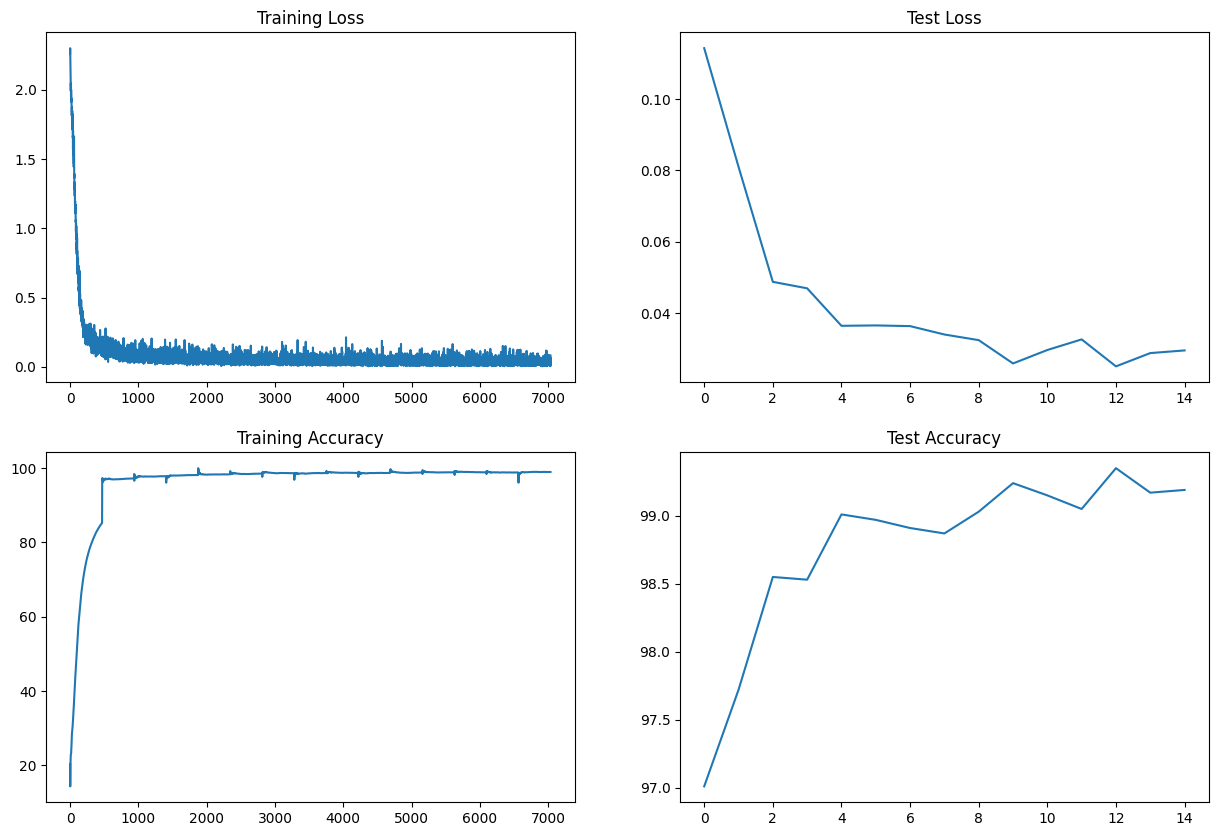

In [5]:
plot_accuracy_loss()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


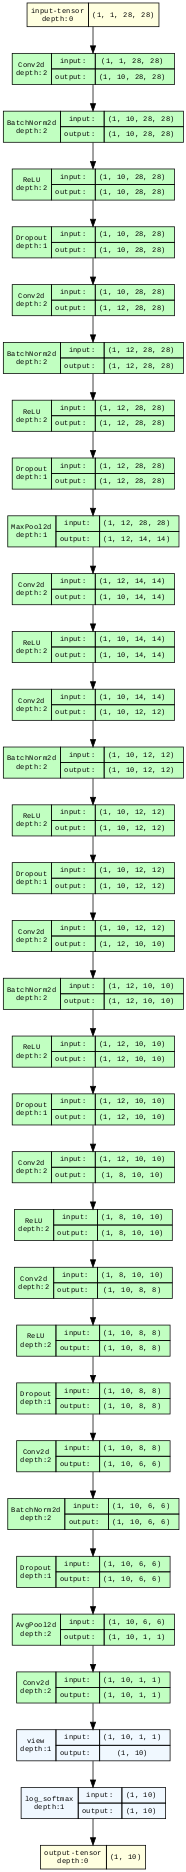

In [6]:
import torchvision
!pip install torchview
from torchview import draw_graph
import graphviz
graphviz.set_jupyter_format('png')
model_graph = draw_graph(model6(), input_size=(1,1,28,28), expand_nested=False)
model_graph.visual_graph